# Titanic Dataset

**Import pandas as pd.**

In [1]:
#importing pandas library
import pandas as pd

**Read titanic dataset.csv.**

In [2]:
#loading data
titanic = pd.read_csv('D:/titanic dataset.csv')

**Check the head of the DataFrame.**

In [3]:
# View first five rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Use the .isnull() method to find out ho null values.**

In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.

-----------------------------------------------------------------------------------

**What is the survival rate between sexes?**

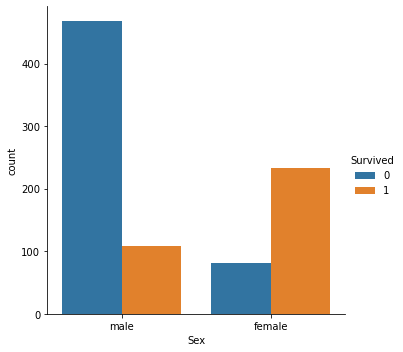

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. 

--------------------------------------------------

**Which Pclass has the best survival rate?**

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

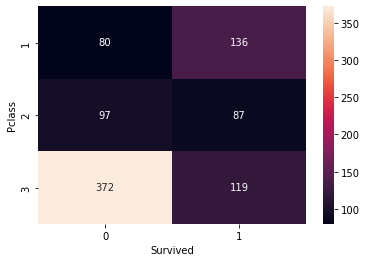

In [6]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

-------------------------------------------

**What is the most surviving age group?**

<AxesSubplot:xlabel='Sex', ylabel='Age'>

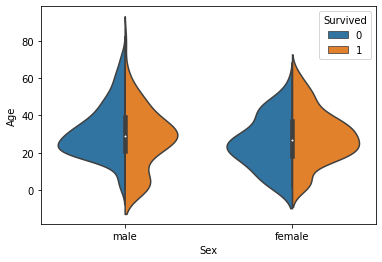

In [7]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = titanic, split = True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

* Good for children.
* High for women in the age range 20-50.
* Less for men as the age increases.

----------------------------------------------------------

**What is the survival rate for family size?**

D:\anacoda3\co\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anacoda3\co\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


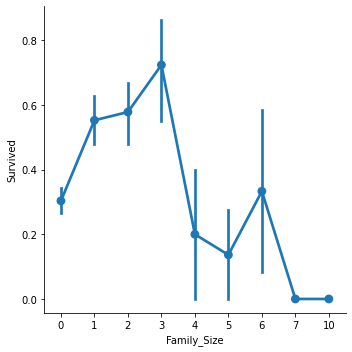

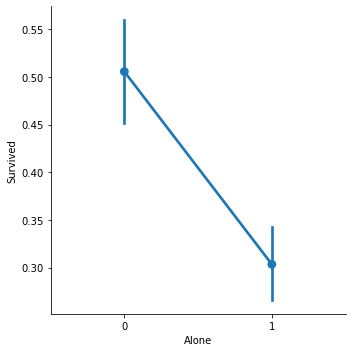

In [8]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']

# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)

# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

Important observations – 

* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decrease considerably.

----------------------------

**Is the price of a ride a reason to survive?** 

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

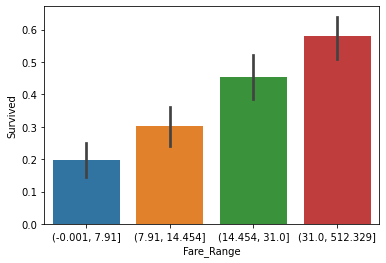

In [9]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic)

 It can be concluded that if a passenger paid a higher fare, the survival rate is more.

***************************

# Thanks